<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe11_Bellmand_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción del problema

Debido a que los grafos dirigidos "impiden" un movimiento más libre entre nodos, es necesario encontrar un camino que sea corto y que incluya todos los nodos entre el nodo de origen y el nodo de llegada.

**Entrada:** Un grafo de la forma $G(V,E)$ con $V$ como la cantidad de nodos y $E$ la cantidad de arcos del mismo, y un nodo de partida $s$.

**Salida:** La distancias más corta entre los nodos $s$ y $v$ y una declaración sobre si contiene un ciclo negativo.

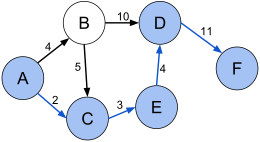




#Descripción del algoritmo

##Dijkstra



En terminos generales podemos decir que el algoritmo Dijkstra se asemeja bastante a un algoritmo Greedy ya qu selecciona la opción más conveniente que ve disponible, dado esto no funciona correctamente con arcos negativos ya que puede no tomarlos en consideración al estar despúes de un arco de un valor mayor al que eligió finalmente. 

Debido a lo último Dijkstra tampoco funciona con ciclos negativos, ya que se quedaría "atrapado" en el. Pero a pesar de las desventajas que posee también es más rapido que su contra parte (Bellmand-Ford) ya que al elegir una mejor opción en su momento, no necesita recorrer más veces el grafo, por lo que su tiempo de ejecución es menor al de Bellmand-Ford


##Bellmand-Ford



Bellmand-For trabaja con programación dinámica, lo que significa que busca entre las mayorías de soluciones posible y elige la que realmente es óptima.

Pero lo anterior tomaría mucho tiempo hacerlo de manera "bruta" por lo que se utlizan los sub-problemas para tener "trozos" previamente solucionados, por lo que al buscar en una nueva opción uno de los trozos puede encajar lo que permite ahorrar el tiempo "simplemente" copiando esa solución.

La principal ventaja de este algoritmo es que es capaz de conseguir una solución incluso si algunos pesos de los arcos del grafo es negativo además de ser capaz de determinar si el grafo posee un ciclo negativo si llegar a fallar.

#Código

###Generador de instancias

In [85]:
import networkx as nx


def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [99]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, 
          mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                if new_vertice == None:
                  return instance_generator(n)
                edge = (i, new_vertice)
                # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) 
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                 # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                edge_with_weight = (m, i, random.randint(-25, 100))
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

##Bellmand-Ford

In [111]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
from termcolor import colored

class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  
        self.graph = []
 

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 

    def printArr(self, dist):
        #print("Vertex Distance from Source")
        for i in range(self.V):
            print("{0}\t\t{1}".format(i, dist[i]))
 



    def BellmanFord(self, src,verbose = False, visualize = False):
        if verbose == True:
          print(f"Grafo recibido: {self.graph}\nTotal de nodos: {self.V}")

        dist = [float("Inf")] * self.V #Se inicilizan las distancias en infinito
        dist[src] = 0 #la distancia del origen se inicializa hacia si mismo
 
        for z in range(self.V - 1):
            
            for u, v, w in self.graph: #Se guarda cada valor del arco actual
                if verbose == True:
                  print(colored(f"\nOrigen arco\tDestino Arco\tPeso Arco", "blue"))
                  print(colored(f"{u}\t\t{v}\t\t{w}", "green"))

                  print(colored(f"¿{dist[u]}+{w} < {dist[v]}?", "yellow"))
                #print(u)
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:#Si la distancia del nodo actual más el peso del arco actual es menor a la distancia del nodo de llegada actual
                    if verbose == True:
                      print(colored(f"Como se cumple, la distancia actualiza por la primera operacion ({dist[u]}+{w})", "green"))
                    dist[v] = dist[u] + w
                else:
                  if verbose == True:
                    print(colored(f"Como no se cumple, la distancia se mantiene en su antiguo valor: {dist[v]}\n", "magenta"))
 
        if verbose == True:
          print(colored(f"Ahora se imprirán las distancias entre:\nLos vertices y el origen","blue"))
          self.printArr(dist)
        if visualize:
          G = nx.DiGraph()
          for u, v, weight in self.graph:
              G.add_node(u)
              G.add_node(v)
              G.add_edge(u, v, weight = weight)
                
          fig, ax = plt.subplots()
          ax.set_facecolor('white')
          pos = graphviz_layout(G, prog = "twopi")

          labels = nx.get_edge_attributes(G, 'weight')
          nx.draw_networkx(G, pos)
          nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)
          nx.draw(G,pos,with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =1.75, edge_color ="green")
 
 

if __name__ == '__main__':
  Gr = Graph(0)
  n = 5
  Gr.graph, gi = instance_generator(n)
  Gr.V = n
  print(Gr.graph, gi)
  Gr.BellmanFord(gi)



[(3, 0, -2), (3, 4, 58), (3, 1, 2), (1, 0, 98), (1, 2, 15), (2, 3, 60), (0, 4, 83), (4, 1, 73), (4, 2, 91)] 3


#Dijkstra

###Generador instancias positivas

In [104]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator2(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, 
          mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) 
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                 # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                edge_with_weight = (m, i, random.randint(1, 100))
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

##Dijkstra

In [112]:
from queue import PriorityQueue

class Graph2:
 
    def __init__(self, vertices):
        self.v = vertices  
        self.graph = []
        self.edges = [[-1 for i in range(vertices)] for j in range(vertices)]
        self.visited = []
 

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 

    def printArr(self, dist):
        print("Vertice Distancia desde Origen")
        for i in range(self.v):
            print("{0}\t\t{1}".format(i, dist[i]))

    def dijkstra(self, start_vertex, visualize = False):
        D = {v:float('inf') for v in range(self.v)}
        D[start_vertex] = 0

        pq = PriorityQueue()
        pq.put((0, start_vertex))

        while not pq.empty():
            (dist, current_vertex) = pq.get()
            self.visited.append(current_vertex)

            for u, v, weight in self.graph:
              if(weight != -1):
                distance = weight
                if v not in self.visited:
                  old_cost = D[v]
                  new_cost = D[u] + distance
                  
                  if new_cost < old_cost:
                    pq.put((u,v))
                    D[v] = new_cost
        
        if visualize:
          print(D)
          self.printArr(D)
          G = nx.DiGraph()
          for u, v, weight in self.graph:
              G.add_node(u)
              G.add_node(v)
              G.add_edge(u, v, weight = weight)
                
          fig, ax = plt.subplots()
          ax.set_facecolor('white')
          pos = graphviz_layout(G, prog = "twopi")

          labels = nx.get_edge_attributes(G, 'weight')
          nx.draw_networkx(G, pos)
          nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)
          nx.draw(G,pos,with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =1.75, edge_color ="green")
          
        return D

if __name__ == '__main__':
  Gr = Graph2(5)
  n = 5
  Gr.graph, gi = instance_generator2(n)
  Gr.v = n
  print(Gr.graph, gi)
  print(Gr.dijkstra(gi))

[(0, 1, 88), (0, 2, 44), (3, 2, 27), (3, 1, 79), (2, 1, 68), (2, 4, 12), (1, 4, 35), (4, 3, 52), (3, 0, 70)] 0
{0: 0, 1: 88, 2: 44, 3: 108, 4: 56}


#Paso a paso

##BellmandFord Verbose == True

In [113]:
if __name__ == '__main__':
  Gr = Graph(0)
  n = 8
  Gr.graph, gi = instance_generator(n)
  Gr.V = n
  print(Gr.graph, gi)
  Gr.BellmanFord(gi, True, False)

[(6, 1, 47), (6, 3, 2), (4, 2, 73), (4, 5, 82), (5, 6, 81), (7, 2, 75), (1, 3, 22), (1, 4, 43), (2, 3, 7), (3, 0, 66), (0, 4, 66), (0, 2, 31), (6, 7, 80)] 6
Grafo recibido: [(6, 1, 47), (6, 3, 2), (4, 2, 73), (4, 5, 82), (5, 6, 81), (7, 2, 75), (1, 3, 22), (1, 4, 43), (2, 3, 7), (3, 0, 66), (0, 4, 66), (0, 2, 31), (6, 7, 80)]
Total de nodos: 8

Origen arco	Destino Arco	Peso Arco
6		1		47
¿0+47 < inf?
Como se cumple, la distancia actualiza por la primera operacion (0+47)

Origen arco	Destino Arco	Peso Arco
6		3		2
¿0+2 < inf?
Como se cumple, la distancia actualiza por la primera operacion (0+2)

Origen arco	Destino Arco	Peso Arco
4		2		73
¿inf+73 < inf?
Como no se cumple, la distancia se mantiene en su antiguo valor: inf


Origen arco	Destino Arco	Peso Arco
4		5		82
¿inf+82 < inf?
Como no se cumple, la distancia se mantiene en su antiguo valor: inf


Origen arco	Destino Arco	Peso Arco
5		6		81
¿inf+81 < 0?
Como no se cumple, la distancia se mantiene en su antiguo valor: 0


Origen arco	

##Visualize == True

[(1, 2, 85), (1, 5, 37), (4, 6, 65), (6, 2, 58), (6, 5, 11), (5, 3, 22), (0, 5, 59), (3, 0, 67), (2, 3, 85), (2, 4, 55), (4, 1, 5)] 1


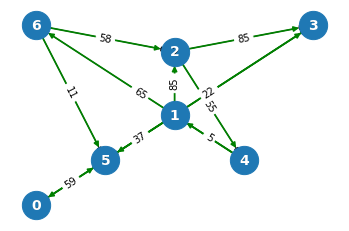

In [115]:
if __name__ == '__main__':
  Gr = Graph(0)
  n = 7
  Gr.graph, gi = instance_generator(n)
  Gr.V = n
  print(Gr.graph, gi)
  Gr.BellmanFord(gi, False, True)

#Tiempo de ejecución

##Bellmand-Ford

Para estimar el tiempo de ejecución del algoritmo se utilizará la función:
> $f_{(n)} * g_{(n)} + h_{(n)}$

donde $f_{(n)}$ es la cantidad de sub-problemas a resolver, $g_{(n)}$ el tiempo en resolver cada sub-problema y $h_{(n)}$ el tiempo en procesar la solución.

**$f_{(n)}$:** Para un grafo con $V$ nodos y $E$ arcos, el total de sub-problemas se define según la cantidad de arcos, considerando que no serán mayores a $V-1$ y que no contiene ciclos negativos por cada uno de estos arcos. En una iteración significa pasar por todos los arcos del grafo, "operando" en cada arco un cantidad de $V-1$ veces.

**$g_{(n)}$:** Para resolver cada sub-problema se debe "operar" en cada arco, tomando esto $O(1)$ ya que la solución es tomada de la pasada anterior y lo que hace la operación en si es comparar la solución pasada con la nueva candidata.

**$h_{(n)}$:** El tiempo de esta parte se puede omitir ya que buscando la cota superior da $O(1)$ en instrucciones de almacenar las soluciones dinámicamente.

Reemplazando lo anterior nos da que:

>$T(n) = \sum_{j=1}^{V}\sum_{i=1}^{E}·c$
>
>$T(n) = c·\sum_{j=1}^{V}E$
>
>$T(n) = c·VE$
>
>$T(n) = O(V*E)$


##Dijkstra

Para calcular el tiempo de Dijkstra se verán los procedimientos y estructruras en este:

Primero se ordenan los nodos según peso de menor a amtor, para esto se utiliza un mónticulo binario, lo que toma $O(log(n))$ con $n$ siendo la cantidad de datos en el grafo, y dado que el algoritmo necesita todos los nodos, realizará $V$ veces las operaciones $O(log(n))$ lo que tomá un total de $O(V*log(n))$.

Sumado a lo anterior también se debe de considerar el arco de menor peso hacia un nodo adyacente. Si se ven todos los arcos adyacente significa que se recorreran todos los arcos del grafo.

Por lo que tomando las partes anteriores en cuenta queda como:

$T(n) = c·E + V·O(log(V))$

$T(n) = c·E + c·V·log(V)$

$T(n) = c·(E + Vlog(V))$

$T(n) = O(E + Vlog(V))$

#Correctitud Bellmand-Ford

Para comprobar la correctitud de Bellmand-Ford se utilizará inducción, para esto consideraremos 2 casos.

> Consideramos a $i$ como el tamaño del problema, $L$ como la distancia entre los nodos $q$ y $s$, con $q$ siendo el nodo de origen y $s$ el nodo de llegada

**Caso Base:** Con $i = 0$, la distancia $L_{q,q} == 0$ es correcta ya que es la distancia de un nodo hacia si mismo. Mientras que para otra distancia $L_{q,s} = ∞_+$ sería correcto ya que no existe un camino a un nodo $s$.

**Caso General:** 
> Para todo nodo $s$ con un camino $L_{q,s}$, el cual es el mínimo entre $q$ y $s$, se usaran a lo mucho $i-1$ arcos.

>Con $q \neq s$, $P$ será el camino más corto entre $q$ y $s$ con $i$ arcos como máximo, además de un nodo $k$ el cual es un nodo previo a $s$ en el camino $P$, siendo $P'$ el camino entre $q$ y $k$.

Tomando el cuenta los datos anteriores tendremos que el valor $L_{P'}$ del camino $P'$ es igual a $L_{i-1, k}$.

En cada n-ésima iteración se actualiza el valor $L_{k,s}$ al valor mínimo entre $L_{n-1, s}$ y $L_{n-1, k} + L_{k,s}$. Sabiendo que $L_{n-1, k} + L_{k,s}$ es igual a $L_{P'} + L_{k,s}$ Lo que a su vez es igual a $L_{P}$, por lo que $L_{n,s} ≤ L_{P}$. También $L_{n-1,s}$ es el valor del camino más corto entre $q$ y $s$ con un máximo de $i-1$ arcos, además de ser al menos igual de largo que $L_{P}$ y que $P$ posee más arcos a considerar.

En el caso que $L_{n,s} = L_{n-1,s}$, la solución al problema de menor tamaño anterior es una posible parte de la solución. En caso de que no exista tal camino $L_{n-1,s} = ∞_+$.

En caso que no ocurra el caso anterior se calcula $L_{n-1,k} + L_{k,s}$, lo cual da el valor de $P'$ más un úlitmo arco que conecte a $k$ con $s$. En caso de que tal camino no exista el valor será $∞_+$.

Asumiendo que las operaciones son correctas. $L_{n,s}$ será correcto ya que al ser dependiente de las soluciones de los sub-problemas, y estos a su vez fueron calculados correctamente da que la solución general es correcta.

Si los camino existen, el mínimo de los casos será $L_{n,s}$ = $P$, lo que significa que es el camino mínimo entre $q$ y $s$ con 4i$ arcos como máximo.

    V = la cantidad nodos en el grafo

Cuando $n = V$, si $L_{V-1,s} = L_{V,s}$ se habrán los caminos mínimos de forma correcta, retornando una lista de los largos correspondientes.

En caso que $L_{V-1,s} \neq  L_{V,s}$ significa que se encontró un ciclo negativo, retornando un mensaje respecto a esto.

Con todo lo anterior podemos decir que Bellmand-Ford es correcto.

#Experimentos

##Tiempo de ejecución

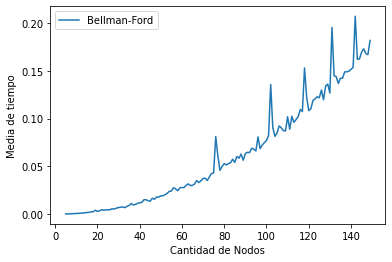

In [107]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]



for n in range(5,150):
  cont = [0]
  g = Graph(n)
  g.graph,gi = instance_generator(n)

  t = repeat(setup = "from __main__ import Graph", stmt = lambda: g.BellmanFord(gi), number = 25, repeat = 10)
  sum = 0
  for i in range(len(t)):
    sum += t[i]

  prom = sum/25
  x.append(n)
  y.append(prom)


plt.plot(x,y)
plt.legend(["Bellman-Ford"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Media de tiempo')
plt.show()

El aumento que se ve en el gráfico corresponde al caso teórico, ya que es menor a un aumento exponencial pero sigue siendo mayor a que si tuviera un logaritmo (este caso ocurre en dijkstra).

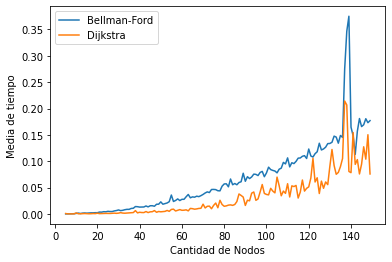

In [110]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]; y1=[]



for n in range(5,150):
  cont = [0]
  g = Graph(n)
  k = Graph2(n)
  k.graph,yi=instance_generator2(n)
  g.graph,gi = instance_generator2(n) #Ambos algorimtos trabajaran solo con pesos positivos

  t = repeat(setup = "from __main__ import Graph", stmt = lambda: g.BellmanFord(gi), number = 10, repeat = 1)
  t1 = repeat(setup = "from __main__ import Graph2", stmt = lambda: k.dijkstra(yi), number = 10, repeat = 1)
  x.append(n)
  y.append(t)
  y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bellman-Ford", "Dijkstra"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Media de tiempo')
plt.show()

Se puede ver como el gráfico de Bellmand-Ford es más lento que el de Dijkstra y esto se debe principalmente a que recorre multiples veces las posibilidades que tiene, esto al tener que corroborar las distancias entre cada nodo, sea el camino óptimo o no, en cambio Dijkstra no realiza esta tarea de manera tan notoria debido a que solo realiza una operacion en $O(log(n))$ según la cantidad de nodos, en cambio Bellmand-Ford Realiza una operación "más rapida" pero muchas más veces, ya que por cada arco realizará la operación un total de veces igual a la cantidad de nodos del grafo.